In [1]:
import meep as mp
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

     cylinder, center = (0,0,0)
          radius 2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (11.56,11.56,11.56)
     cylinder, center = (0,0,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


/home/311514090/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/311514090/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


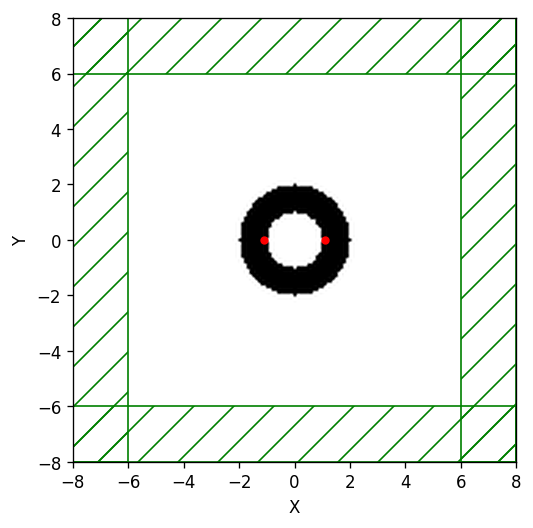

In [2]:
n = 3.4
w = 1
r = 1
pad = 4
dpml = 2

sxy = 2 * (r + w + pad + dpml)
cell_size = mp.Vector3(sxy, sxy)

pml_layers = [mp.PML(dpml)]

nonpml_vol = mp.Volume(mp.Vector3(), size=mp.Vector3(sxy - 2 * dpml, sxy - 2 * dpml))

geometry = [
    mp.Cylinder(radius=r + w, material=mp.Medium(index=n)),
    mp.Cylinder(radius=r),
]

fcen = 0.118

src = [
    mp.Source(mp.ContinuousSource(fcen), component=mp.Ez, center=mp.Vector3(r + 0.1)),
    mp.Source(
        mp.ContinuousSource(fcen),
        component=mp.Ez,
        center=mp.Vector3(-(r + 0.1)),
        amplitude=-1,
    ),
]

symmetries = [mp.Mirror(mp.X, phase=-1), mp.Mirror(mp.Y, phase=+1)]

sim = mp.Simulation(
    cell_size=cell_size,
    geometry=geometry,
    sources=src,
    resolution=10,
    force_complex_fields=True,
    symmetries=symmetries,
    boundary_layers=pml_layers,
)
f = plt.figure(dpi=120)
sim.plot2D(ax=f.gca())
plt.show()

In [5]:
num_tols = 5
tols = np.power(10, np.arange(-8.0, -8.0 - num_tols, -1.0))
ez_dat = np.zeros((122, 122, num_tols), dtype=np.complex_)

for i in range(num_tols):
    sim.init_sim()
    sim.solve_cw(tols[i], 10000, 10)
    ez_dat[:, :, i] = sim.get_array(vol=nonpml_vol, component=mp.Ez)

IndexError: index 0 is out of bounds for axis 0 with size 0

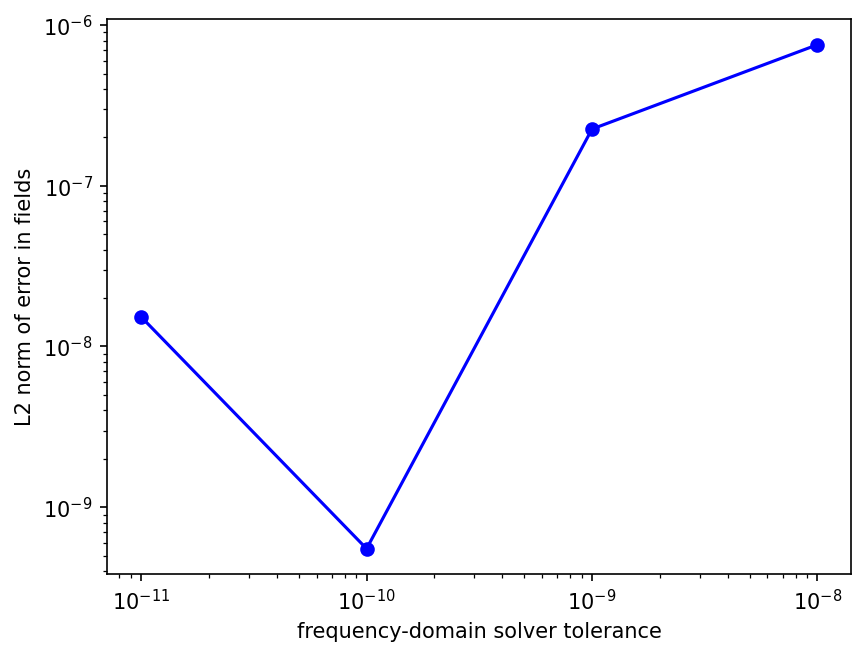

In [4]:
err_dat = np.zeros(num_tols - 1)
for i in range(num_tols - 1):
    err_dat[i] = LA.norm(ez_dat[:, :, i] - ez_dat[:, :, num_tols - 1])

plt.figure(dpi=150)
plt.loglog(tols[: num_tols - 1], err_dat, "bo-")
plt.xlabel("frequency-domain solver tolerance")
plt.ylabel("L2 norm of error in fields")
plt.show()